In [1]:
include("../../HamiltonODE.jl")
using Plots
pyplot();
using LaTeXStrings

Finished loading HamiltonSystem
Finished loading HamiltonSteps
Finished loading HamiltonIntegrator
Finished loading HamiltonPlot
Finished loading HamiltonODE


In [2]:
d = 2
m = ((2,2/3),)
q0 = [0.5,1.0]
p0 =[0.1,0.1]

phi(r) = 4*(r^-12-r^-6)
dphi(r) = 4*(-12*r^-13 +6*r^-7)

U(q) = 2*phi(norm(q))+phi(2*q[1])
F(q) =-2*dphi(norm(q))*q/norm(q)-dphi(2*q[1])*2*[1,0]


HS = HamiltonSystem(d,m,q0,p0,F,U);

In [3]:
T=1
dts = [1*2.0^-i for i in 2:12];

ConvArgs = [:xaxis => :log, :yaxis => :log, :style => [:dash :solid]];

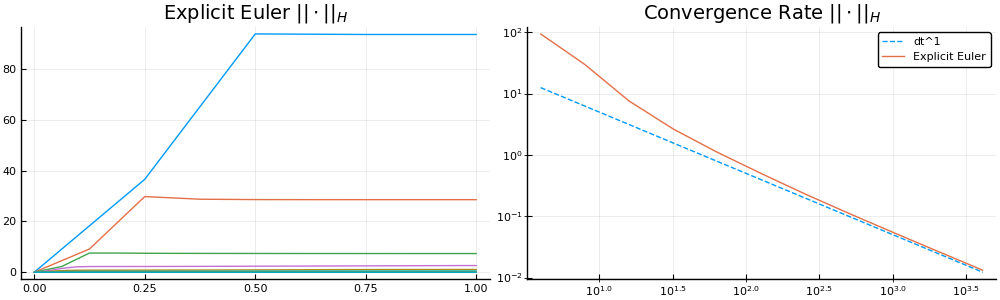

In [4]:
Is = [Integrator(euler_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
EulerEnergyErrors = getEnergyErrors(HS,Qs,Ps)
p1 = plot(ts,EulerEnergyErrors,label="",title=L"Explicit Euler $||\cdot||_H$")
p2 = plot(1 ./ dts,[50*dts,[max(EulerEnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^1" "Explicit Euler"], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,size=(1000,300))

Integrating using i_euler_step dt = 0.000244140625...100% Time: 0:00:01


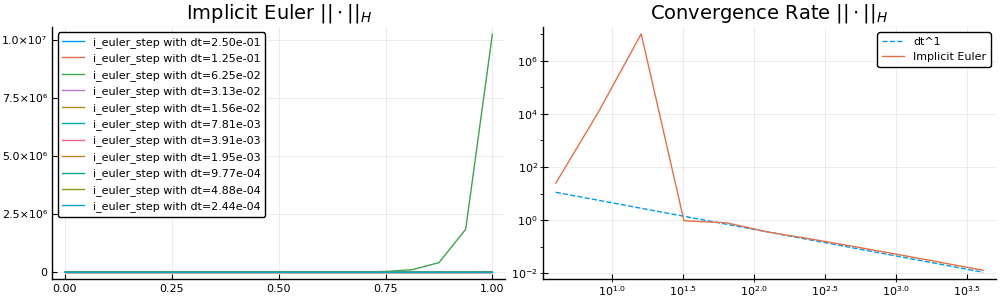

In [5]:
Is = [Integrator(i_euler_step,dt,T,no_warning=true) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
IEulerEnergyErrors = getEnergyErrors(HS,Qs,Ps)
p1 = plot(ts,IEulerEnergyErrors,label=hcat(names...),title=L"Implicit Euler $||\cdot||_H$")
p2 = plot(1 ./ dts,[45*dts, [max(IEulerEnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^1" "Implicit Euler" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,size=(1000,300))

Integrating using theta_step dt = 0.00048828125...100%|█| Time: 0:00:00
Integrating using theta_step dt = 0.000244140625...100% Time: 0:00:00


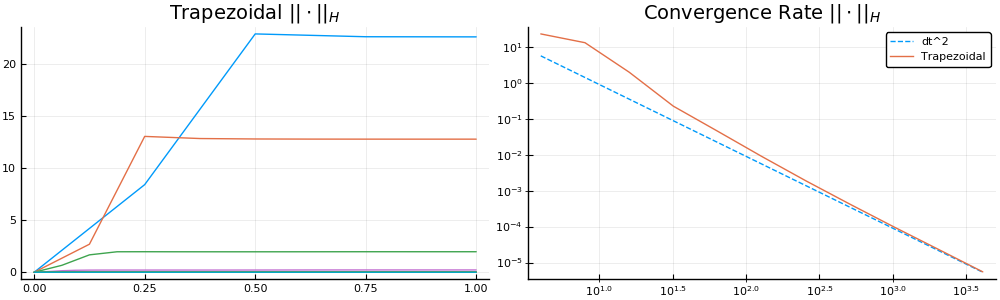

In [6]:
Is = [Integrator(theta_step,dt,T,theta=0.5,no_warning=true) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
TrapezEnergyErrors = getEnergyErrors(HS,Qs,Ps)
p1 = plot(ts,TrapezEnergyErrors,label="",title=L"Trapezoidal $||\cdot||_H$")
p2 = plot(1 ./ dts,[90*dts.^2, [max(TrapezEnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^2" "Trapezoidal" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,size=(1000,300))

Integrating using verlet_step dt = 0.000244140625...100% Time: 0:00:00


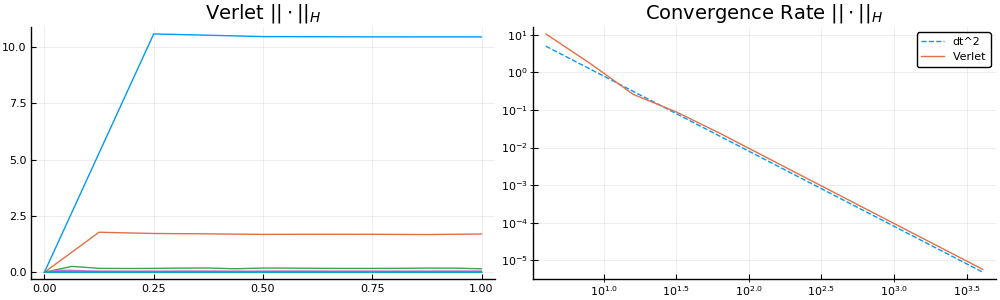

In [7]:
Is = [Integrator(verlet_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
VerletEnergyErrors = getEnergyErrors(HS,Qs,Ps)
p1 = plot(ts,VerletEnergyErrors,label="",title=L"Verlet $||\cdot||_H$")
p2 = plot(1 ./ dts,[80*dts.^2, [max(VerletEnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^2" "Verlet" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,size=(1000,300))

Integrating using rk4_step dt = 0.0009765625...100%|████| Time: 0:00:00
Integrating using rk4_step dt = 0.00048828125...100%|███| Time: 0:00:00
Integrating using rk4_step dt = 0.000244140625...100%|██| Time: 0:00:00


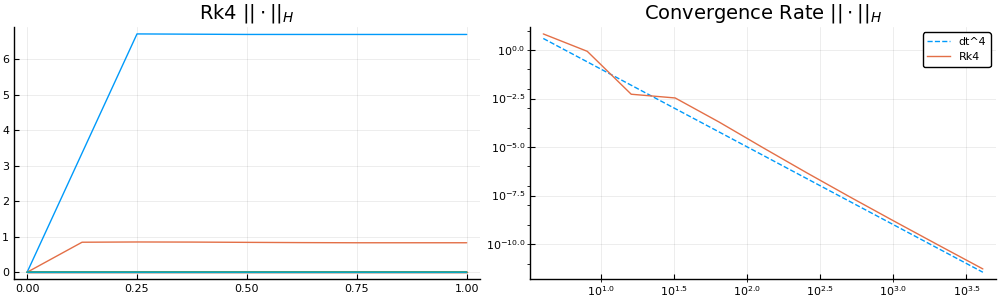

In [8]:
Is = [Integrator(rk4_step,dt,T) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
Rk4EnergyErrors = getEnergyErrors(HS,Qs,Ps)
p1 = plot(ts,Rk4EnergyErrors,label="",title=L"Rk4 $||\cdot||_H$")
p2 = plot(1 ./ dts,[1000*dts.^4, [max(Rk4EnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^4" "Rk4" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,size=(1000,300))

Integrating using projected_step dt = 0.000244140625...100% Time: 0:00:00


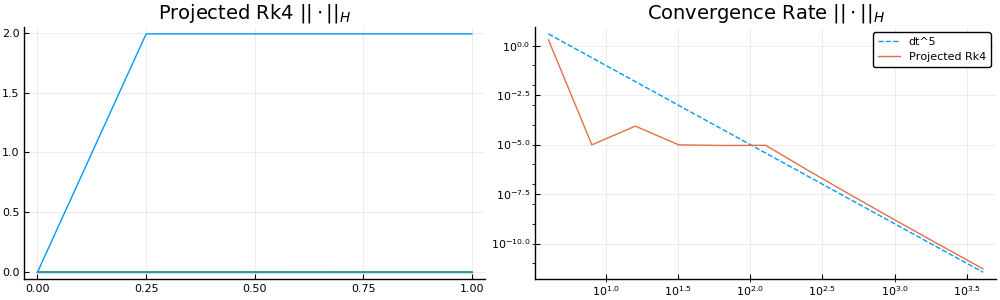

In [9]:
Is = [Integrator(projected_step,dt,T,no_warning=true) for dt in dts];
ts,Qs,Ps = integrate(HS,Is);
names = getNames(Is)
PRk4EnergyErrors = getEnergyErrors(HS,Qs,Ps)
p1 = plot(ts,PRk4EnergyErrors,label="",title=L"Projected Rk4 $||\cdot||_H$")
p2 = plot(1 ./ dts,[1000*dts.^4, [max(PRk4EnergyErrors[i]...) for i in 1:length(dts)]],
    label=["dt^5" "Projected Rk4" ], title=L"Convergence Rate $||\cdot||_H$";ConvArgs...)
plot(p1,p2,size=(1000,300))